In [1]:
# Load libraries
import pandas as pd
import numpy as np 
from numpy.random import default_rng
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Task 1 : Data Exploration and visualization

In [2]:
wine  = pd.read_csv("D:\Data Science\Course 9\DS2_C5_S4_Wine_Data_Practice.data")
wine.columns = ['Class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids','Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 Of  diluted wines', 'Proline']
wine

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 Of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine.dtypes

Class                              int64
Alcohol                          float64
Malic acid                       float64
Ash                              float64
Alcalinity of ash                float64
Magnesium                          int64
Total phenols                    float64
Flavanoids                       float64
Nonflavanoid phenols             float64
Proanthocyanins                  float64
Color intensity                  float64
Hue                              float64
OD280/OD315 Of  diluted wines    float64
Proline                            int64
dtype: object

In [4]:
wine.shape

(177, 14)

In [5]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,177.0,1.943503,0.773991,1.00,1.00,2.00,3.00,3.00
Alcohol,177.0,12.993672,0.808808,11.03,12.36,13.05,13.67,14.83
Malic acid,177.0,2.339887,1.119314,0.74,1.60,1.87,3.10,5.80
Ash,177.0,2.366158,0.275080,1.36,2.21,2.36,2.56,3.23
Alcalinity of ash,177.0,19.516949,3.336071,10.60,17.20,19.50,21.50,30.00
Magnesium,177.0,99.587571,14.174018,70.00,88.00,98.00,107.00,162.00
Total phenols,177.0,2.292260,0.626465,0.98,1.74,2.35,2.80,3.88
Flavanoids,177.0,2.023446,0.998658,0.34,1.20,2.13,2.86,5.08
Nonflavanoid phenols,177.0,0.362316,0.124653,0.13,0.27,0.34,0.44,0.66
Proanthocyanins,177.0,1.586949,0.571545,0.41,1.25,1.55,1.95,3.58


In [6]:
wine.groupby('Class').mean()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 Of diluted wines,Proline
Class,,,,,,,,,,,,,
1,13.736379,2.015862,2.456034,17.062069,105.982759,2.840862,2.981034,0.290172,1.892586,5.526379,1.062414,3.144655,1116.586207
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


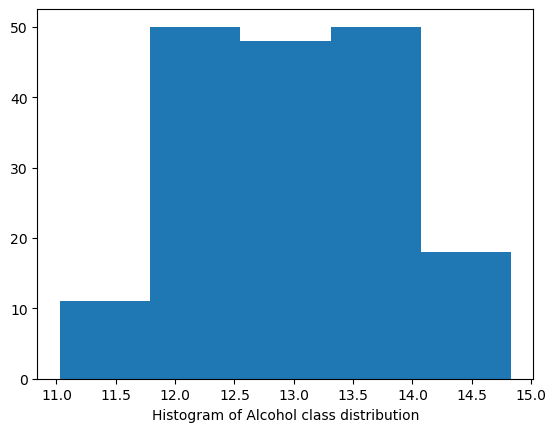

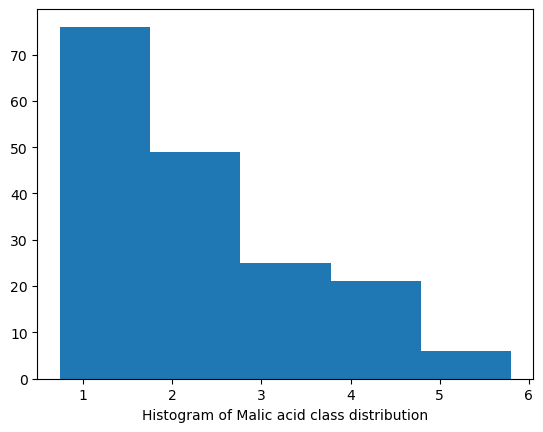

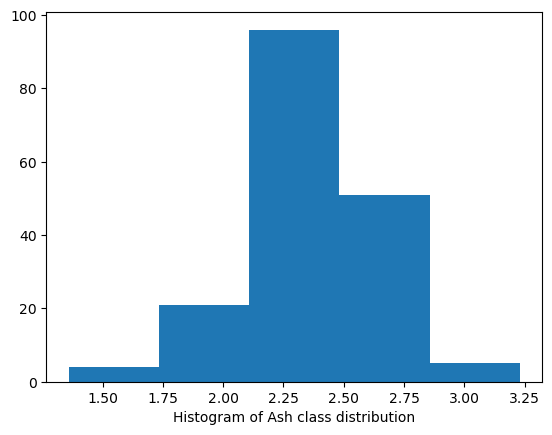

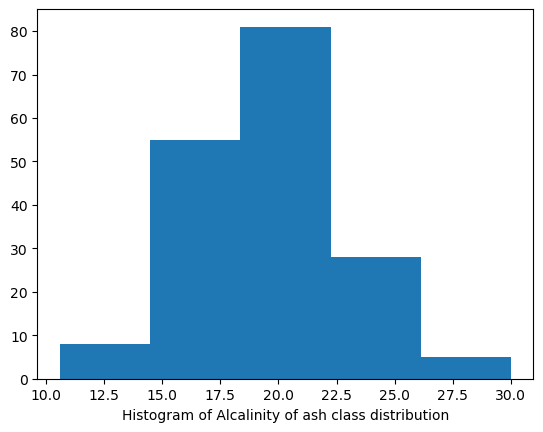

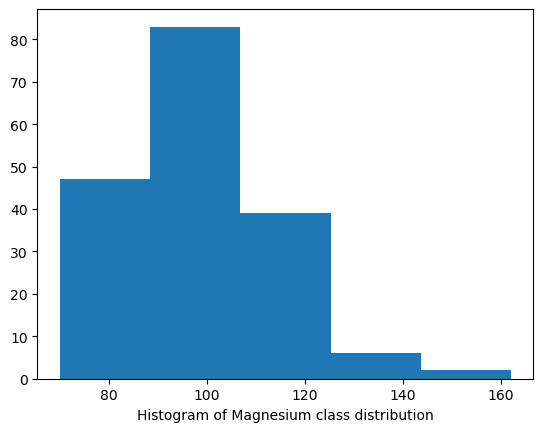

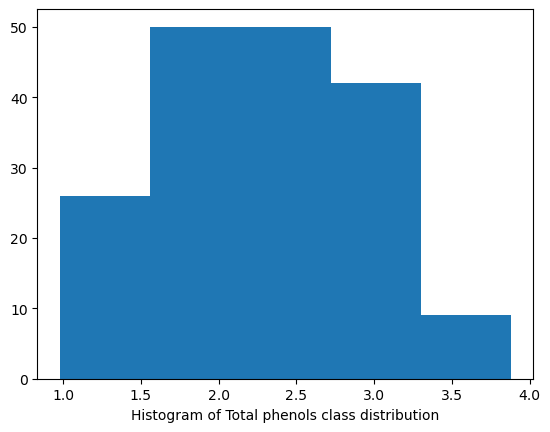

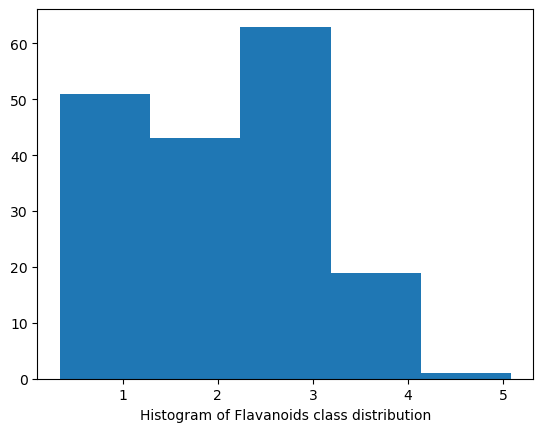

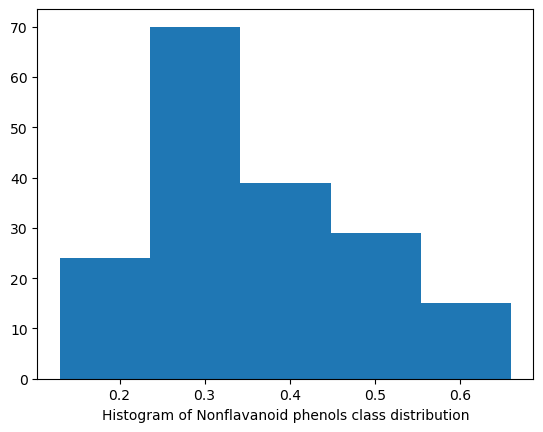

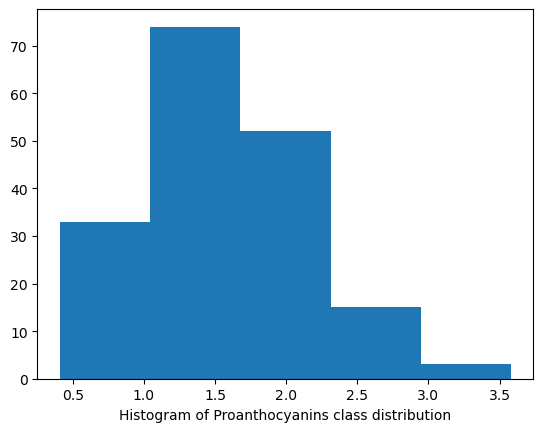

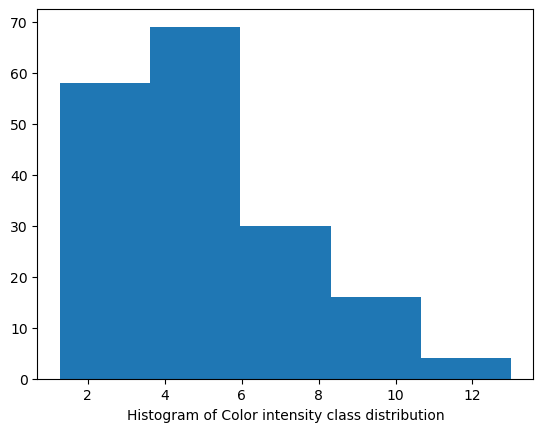

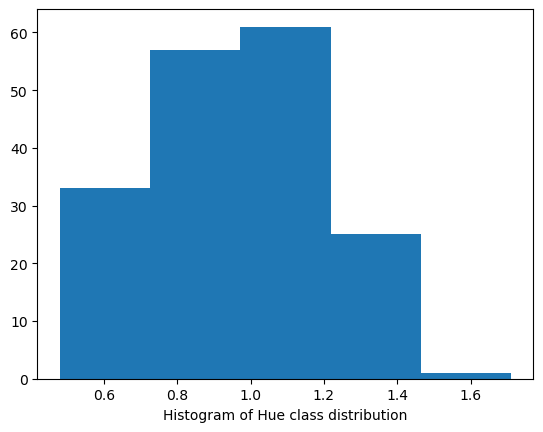

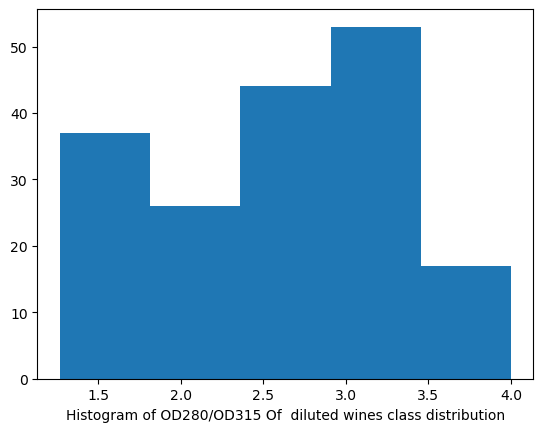

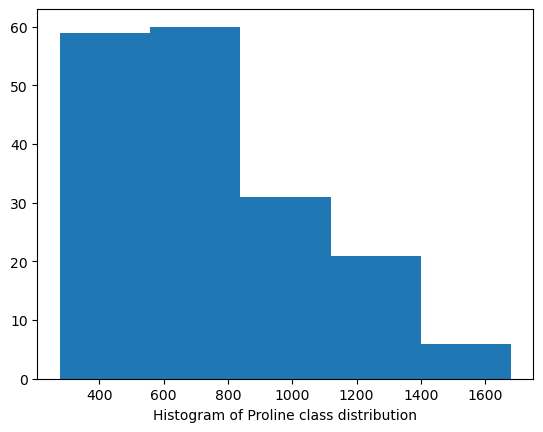

In [39]:
for item in wine.columns:
    if(item=="Class"):
        continue
    plt.hist(wine[item],bins=5)
    plt.xlabel("Histogram of {0} class distribution".format(item))
    plt.show()

# Task 2 : Data processing

In [7]:
wine.isnull().sum()

Class                            0
Alcohol                          0
Malic acid                       0
Ash                              0
Alcalinity of ash                0
Magnesium                        0
Total phenols                    0
Flavanoids                       0
Nonflavanoid phenols             0
Proanthocyanins                  0
Color intensity                  0
Hue                              0
OD280/OD315 Of  diluted wines    0
Proline                          0
dtype: int64

In [8]:
column_correlation= wine.corr()
column_correlation

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 Of diluted wines,Proline
Class,1.000000,-0.321238,0.436127,-0.048260,0.513963,-0.198944,-0.717933,-0.846485,0.487215,-0.494887,0.268562,-0.617690,-0.786428,-0.631227
Alcohol,-0.321238,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
Malic acid,0.436127,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
Ash,-0.048260,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
Alcalinity of ash,0.513963,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
Magnesium,-0.198944,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
Total phenols,-0.717933,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
Flavanoids,-0.846485,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
Nonflavanoid phenols,0.487215,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
Proanthocyanins,-0.494887,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731


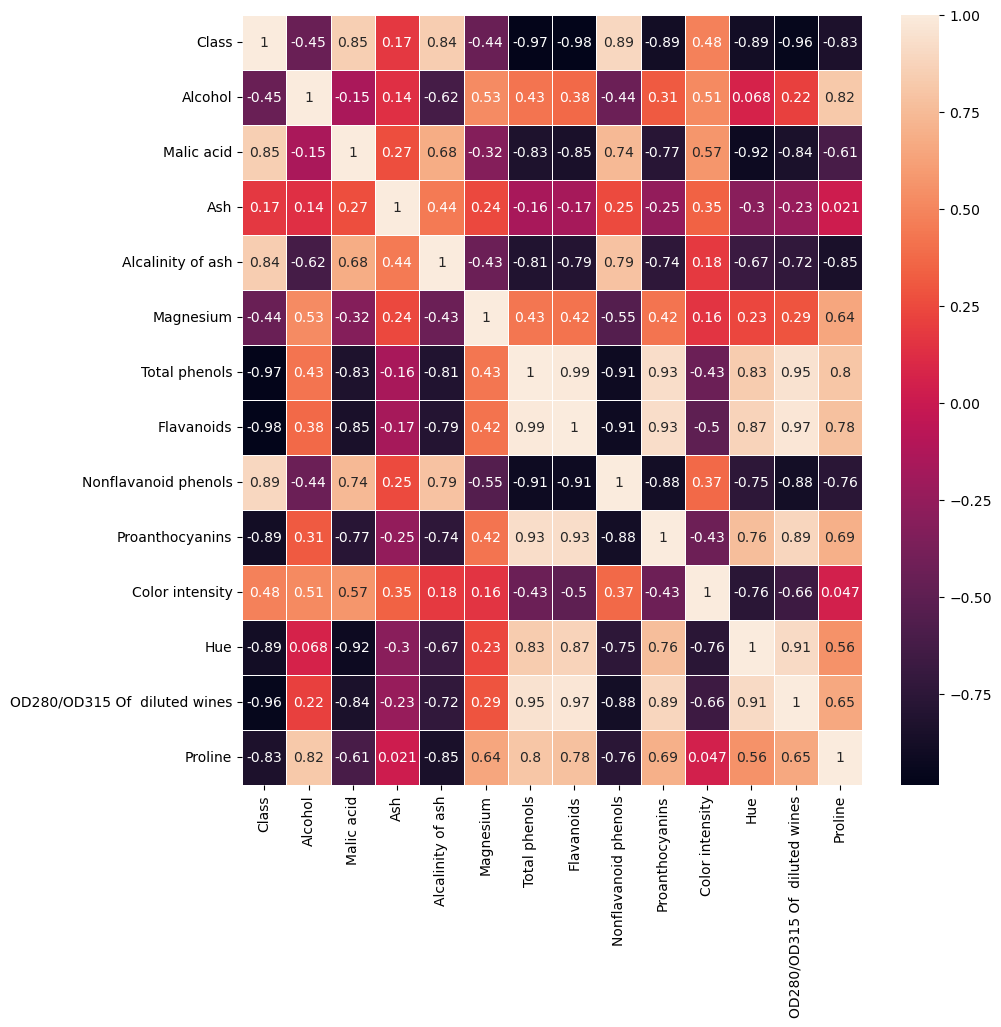

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(column_correlation.corr(),annot=True,linewidths=.5)
plt.show()

'Malic acid','Alcalinity of ash', 'Nonflavanoid phenols','Total phenols','Flavanoids','Proanthocyanins','OD280/OD315 Of  diluted wines', 'Proline' = This columns are highly correlation

In [36]:
x = wine.loc[:, ['Malic acid','Alcalinity of ash', 'Nonflavanoid phenols','Total phenols','Flavanoids','Proanthocyanins','OD280/OD315 Of  diluted wines', 'Proline']].values 
y = wine['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print(x_train) 
#print(x_test) 
features = ['Malic acid','Alcalinity of ash', 'Nonflavanoid phenols','Total phenols','Flavanoids','Proanthocyanins','OD280/OD315 Of  diluted wines', 'Proline']

[[3.03e+00 2.70e+01 6.30e-01 ... 1.14e+00 1.73e+00 8.80e+02]
 [5.51e+00 2.50e+01 6.30e-01 ... 1.10e+00 1.69e+00 5.15e+02]
 [3.17e+00 1.80e+01 4.50e-01 ... 2.81e+00 2.83e+00 4.06e+02]
 ...
 [1.81e+00 1.72e+01 3.00e-01 ... 1.46e+00 2.88e+00 1.31e+03]
 [2.83e+00 1.80e+01 2.50e-01 ... 1.99e+00 3.30e+00 2.90e+02]
 [1.72e+00 1.95e+01 3.70e-01 ... 1.42e+00 2.44e+00 4.15e+02]]


#  Task 3 : Modelling - Naive Bayes

In [19]:
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test) 


In [20]:
# Fitting Naive Bayes to the Training set  
classifier = GaussianNB() 
classifier.fit(x_train, y_train) 


GaussianNB()

In [21]:
# Predicting the Test set results 
y_pred = classifier.predict(x_test) 

In [22]:
# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred) 
cm

array([[12,  2,  0],
       [ 2, 10,  2],
       [ 0,  1,  7]], dtype=int64)

In [23]:
# Evaluate Accuracy Score
accuracy_score(y_test, y_pred)

0.8055555555555556

In [41]:
probs=classifier.predict_proba(x_test)

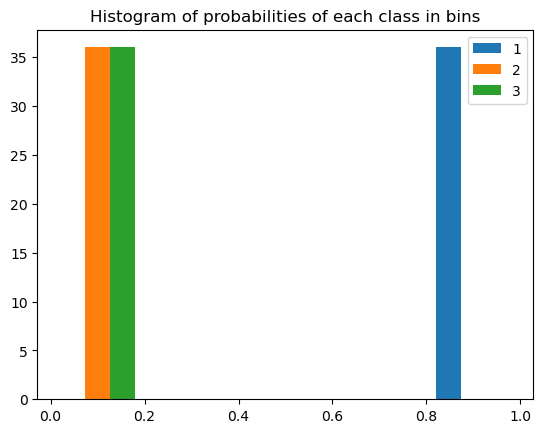

In [42]:
plt.hist(probs,bins=5,label=["1","2","3"])
plt.legend()
plt.title("Histogram of probabilities of each class in bins")
plt.show()

# Task 4 : Modelling - Decision Tree

In [25]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [29]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0, 11,  3],
       [ 0,  2,  6]], dtype=int64)

In [32]:
# Evaluate other metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred, average='weighted'))


accuracy: 0.8333333333333334
recall: 0.8333333333333334
f1-score: 0.8369038973614137


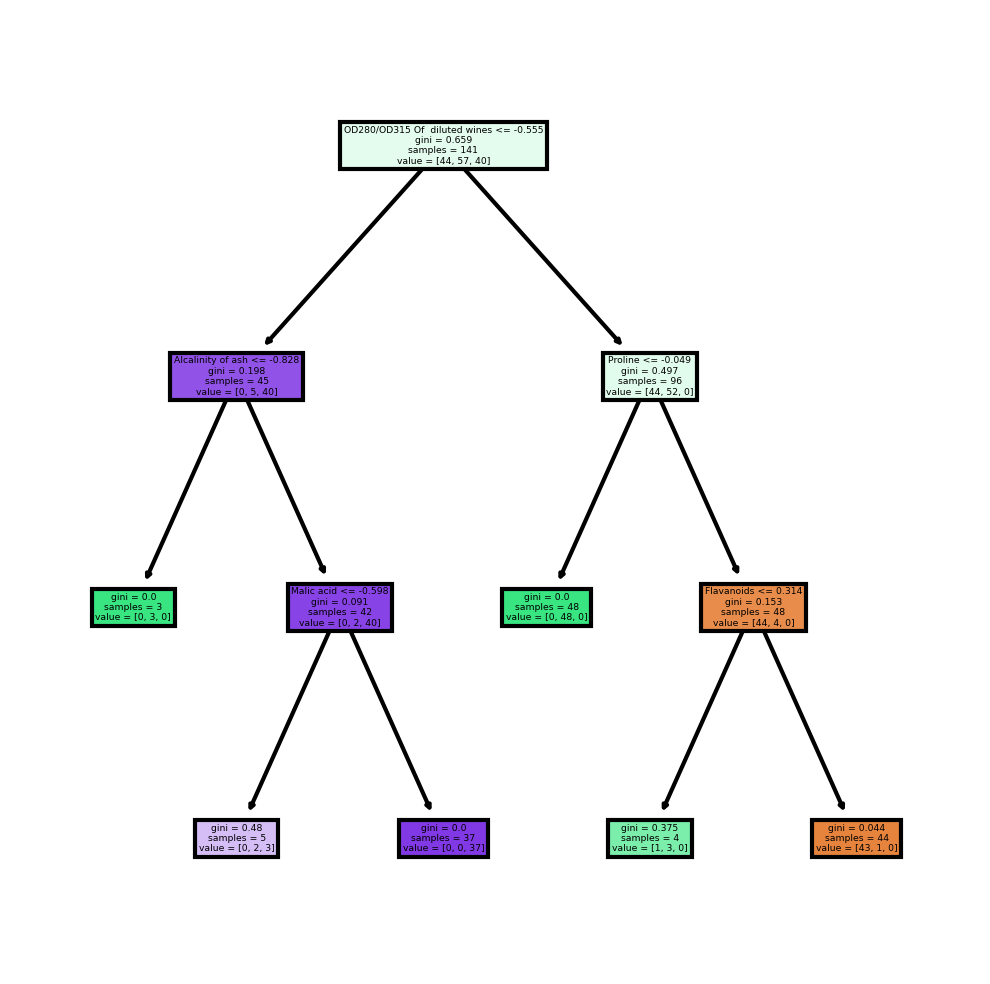

In [43]:
#Visualize the decision tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,feature_names = features,filled = True);
